In [1]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
customers= pd.read_csv('df_databird-synthesized-customers-extract_foxbolt.csv')
customers

,year_month,merchant_name,order_item_delivery_address_region,count_customers
0,2017-01,deliveroo,idf - paris,544
1,2017-01,deliveroo,idf - rest of idf,121
2,2017-01,deliveroo,other region,636
3,2017-01,just eat,idf - paris,167
4,2017-01,just eat,idf - rest of idf,358
...,...,...,...,...
373,2020-06,just eat,idf - rest of idf,684
374,2020-06,just eat,other region,769
375,2020-06,uber eats,idf - paris,2019
376,2020-06,uber eats,idf - rest of idf,3278


In [3]:
#conversion en datetime
customers["year_month"]=pd.to_datetime(customers["year_month"])

In [4]:
#verif de la longueur de la plage de données
customers["year_month"].nunique

<bound method IndexOpsMixin.nunique of 0     2017-01-01
1     2017-01-01
2     2017-01-01
3     2017-01-01
4     2017-01-01
         ...    
373   2020-06-01
374   2020-06-01
375   2020-06-01
376   2020-06-01
377   2020-06-01
Name: year_month, Length: 378, dtype: datetime64[ns]>

In [5]:
#création de la periode
customers['periode']=customers['year_month'].dt.to_period('M')

In [6]:
customers

,year_month,merchant_name,order_item_delivery_address_region,count_customers,periode
0,2017-01-01,deliveroo,idf - paris,544,2017-01
1,2017-01-01,deliveroo,idf - rest of idf,121,2017-01
2,2017-01-01,deliveroo,other region,636,2017-01
3,2017-01-01,just eat,idf - paris,167,2017-01
4,2017-01-01,just eat,idf - rest of idf,358,2017-01
...,...,...,...,...,...
373,2020-06-01,just eat,idf - rest of idf,684,2020-06
374,2020-06-01,just eat,other region,769,2020-06
375,2020-06-01,uber eats,idf - paris,2019,2020-06
376,2020-06-01,uber eats,idf - rest of idf,3278,2020-06


In [7]:
products = pd.read_csv('df_synthesized-products-extract_foxbolt.csv')
products

,f0_,id_order,product_name,product_description,merchant_name
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,NaN,deliveroo
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,sauce soja,deliveroo
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,"sauce soja sucree, baguettes, sauce soja sucre...",deliveroo
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,any three skewers with lamb & chicken doner se...,deliveroo
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,NaN,deliveroo
...,...,...,...,...,...
1711611,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,NaN,uber eats
1711612,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711613,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711614,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,NaN,deliveroo


In [8]:
#renomer colonne + conversion en datetime
products = products.rename(columns = {'f0_' : 'order_date'})
products['order_date']=pd.to_datetime(products['order_date'])

In [9]:
#check des NaN et de leur répartition
nanprod=products[products['product_name'].isna()]
nanprod['product_name'].isna().groupby(nanprod['order_date']).sum()

order_date
2017-01-01      4
2017-01-02      5
2017-01-03     11
2017-01-04     15
2017-01-05     15
             ... 
2020-06-26     99
2020-06-27    123
2020-06-28    104
2020-06-29    125
2020-06-30     74
Name: product_name, Length: 1277, dtype: int64

In [10]:
#création d'une copie
product2 = products

In [11]:
#drop de colonne product_description
product2 = product2.drop('product_description', axis=1)

In [12]:
#drop des lignes en NaN de product_name
product2 = product2.dropna(subset=['product_name'])

In [13]:
#création de la periode pour les cohortes
product2['periode']=product2['order_date'].dt.to_period('M')
product2

,order_date,id_order,product_name,merchant_name,periode
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,deliveroo,2017-01
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,deliveroo,2017-01
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,deliveroo,2017-01
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,deliveroo,2017-01
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,deliveroo,2017-01
...,...,...,...,...,...
1711611,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,uber eats,2020-06
1711612,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,uber eats,2020-06
1711613,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,uber eats,2020-06
1711614,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,deliveroo,2020-06


In [14]:
product2=product2.reset_index()

In [15]:
#clean des colonnes
product2=product2.drop('index', axis=1)

In [16]:
product2

,order_date,id_order,product_name,merchant_name,periode
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,deliveroo,2017-01
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,deliveroo,2017-01
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,deliveroo,2017-01
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,deliveroo,2017-01
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,deliveroo,2017-01
...,...,...,...,...,...
1607293,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,uber eats,2020-06
1607294,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,uber eats,2020-06
1607295,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,uber eats,2020-06
1607296,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,deliveroo,2020-06


In [17]:
transactions = pd.read_csv('df_synthesized-transactions-extract_foxbolt.csv')
transactions

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,...,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
0,1,2.0,Gen. Y - [1980-1994],NaN,deliveroo,2020-01-15,12:00:00,10.3,eur,NaN,...,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1
1,2,1.0,Gen. Z - [1995-2010],NaN,uber eats,2019-01-24,19:00:00,7.6,eur,payment card - visa,...,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1
2,3,1.0,Gen. Z - [1995-2010],NaN,uber eats,2020-02-05,12:00:00,10.6,eur,paypal,...,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0
3,4,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-01-11,21:00:00,0.0,eur,NaN,...,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0
4,5,NaN,Gen. Z - [1995-2010],NaN,deliveroo,2019-12-15,20:00:00,25.3,eur,NaN,...,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807671,807672,2.0,Gen. Z - [1995-2010],NaN,just eat,2019-04-10,20:00:00,0.6,eur,NaN,...,NaN,0.0,NaN,NaN,provence alpes cote d azur,bouches du rhone,marseille,0,1,0
807672,807673,2.0,Gen. Z - [1995-2010],NaN,uber eats,2020-06-01,18:00:00,16.3,eur,paypal,...,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0
807673,807674,1.0,NaN,NaN,uber eats,2018-12-02,19:00:00,15.9,eur,paypal,...,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0
807674,807675,2.0,Gen. Z - [1995-2010],NaN,uber eats,2020-03-14,17:00:00,30.0,eur,payment card - visa,...,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0


In [18]:
transactions2 = transactions

In [19]:
transactions2.isna().sum()

row_nb                                        0
synthetic_gender                          30386
synthetic_age_generation                  49900
is_loyalty_deliveroo                     778431
merchant_name                                 0
order_date                                    0
order_time                                    0
order_total_paid                          30207
order_currency                                0
payment_method_name                      365297
order_delivery_fee                          199
order_processing_fee                          0
order_total_fees                         103915
order_total_promo                             0
seller_name                               74717
seller_category_name                      79814
order_item_delivery_address_region         4951
order_item_delivery_address_subregion      4951
order_item_delivery_address_city           4951
is_customer_month_ubereats                    0
is_customer_month_justeat               

In [20]:
#drop colonne is loyalty deliveroo et order currency, passage en datetime + isolation de la periode et de l'heure
transactions2 = transactions2.drop('is_loyalty_deliveroo', axis=1)
transactions2 = transactions2.drop('order_currency', axis=1)
transactions2['order_date']=pd.to_datetime(transactions2['order_date'])
transactions2['periode']=transactions2['order_date'].dt.to_period('M')
transactions2['order_time']=pd.to_datetime(transactions2['order_time']).dt.hour

C:\Users\BDUPUIS\AppData\Local\Temp\ipykernel_4620\3159472018.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  transactions2['order_time']=pd.to_datetime(transactions2['order_time']).dt.hour


In [21]:
 transactions2['synthetic_gender'].value_counts()

synthetic_gender
1.0    548952
2.0    228338
Name: count, dtype: int64

In [22]:
#creation d'une catégorie 3 dans les genders pour ceux qui sont non renseignés
transactions2['synthetic_gender']=transactions2['synthetic_gender'].fillna(3)
#renommer colonne gender
transactions2 = transactions2.rename(columns = {'synthetic_gender' : 'gender'})

In [23]:
transactions2['gender'].value_counts()

gender
1.0    548952
2.0    228338
3.0     30386
Name: count, dtype: int64

In [24]:
#création d'une colonne pour le sexe
transactions2['sex']=transactions2['gender']

In [25]:
#dico pour renommer les lignes dans la nouvelle colonne "sexe"
dic = {1:'male', 2:'female',3:'unknown'}

In [26]:
transactions2['sex']=transactions2['sex'].replace(dic)

In [27]:
transactions2

,row_nb,gender,synthetic_age_generation,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,...,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex
0,1,2.0,Gen. Y - [1980-1994],deliveroo,2020-01-15,12,10.3,NaN,0.0,0.0,...,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,2020-01,female
1,2,1.0,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,...,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male
2,3,1.0,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,...,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male
3,4,1.0,Gen. Y - [1980-1994],just eat,2019-01-11,21,0.0,NaN,0.0,0.0,...,NaN,NaN,ile de france,val d oise,cergy,0,1,0,2019-01,male
4,5,3.0,Gen. Z - [1995-2010],deliveroo,2019-12-15,20,25.3,NaN,2.5,0.0,...,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,2019-12,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807671,807672,2.0,Gen. Z - [1995-2010],just eat,2019-04-10,20,0.6,NaN,0.0,0.0,...,NaN,NaN,provence alpes cote d azur,bouches du rhone,marseille,0,1,0,2019-04,female
807672,807673,2.0,Gen. Z - [1995-2010],uber eats,2020-06-01,18,16.3,paypal,0.5,1.4,...,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0,2020-06,female
807673,807674,1.0,NaN,uber eats,2018-12-02,19,15.9,paypal,3.9,0.0,...,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0,2018-12,male
807674,807675,2.0,Gen. Z - [1995-2010],uber eats,2020-03-14,17,30.0,payment card - visa,3.5,0.0,...,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0,2020-03,female


In [28]:
pd.set_option('display.max_columns', None)

In [29]:
#passage en integer
transactions2['gender']=transactions2['gender'].astype('int64')

In [30]:
check = transactions2[transactions2['order_total_paid']==0]

In [31]:
check['merchant_name'].value_counts()

merchant_name
just eat     38720
deliveroo     1098
uber eats      354
Name: count, dtype: int64

In [32]:
#renommer colonne age
transactions2 = transactions2.rename(columns = {'synthetic_age_generation' : 'age'})
#modif des NaN en Unknown pour age payment methode
transactions2['age']=transactions2['age'].fillna('Unknown')
transactions2['payment_method_name']=transactions2['payment_method_name'].fillna('Unknown')
transactions2[['seller_name','seller_category_name','order_item_delivery_address_region','order_item_delivery_address_subregion',
               'order_item_delivery_address_city']]=transactions2[['seller_name','seller_category_name','order_item_delivery_address_region',
                'order_item_delivery_address_subregion','order_item_delivery_address_city']].fillna('Unknown')

In [33]:
# dico pour les seller category name avec nvelle colonne 'category name'
dic = {'north american - burger':'North american','european - italian - pizza':'European','latin american - mexican':'Latin american','asian - japanese - sushi':'Asian',
       'north american - chicken':'North american','north american - sandwich':'North american', 'european - french':'European','asian - thai':'Asian','european - italian - others':'European',
       'asian - indian':'Asian','north american - others':'North american','north american - hawaiian':'North american','asian - japanese - others':'Asian', 'middle eastern - kebab':'Middle eastern',
       'asian - vietnamese':'Asian', 'asian - others':'Asian','asian - chinese':'Asian','middle eastern - lebanese':'Middle eastern','european - salad':'European','north american - bbq':'North american',
       'european - others':'European','middle eastern - others':'Middle eastern','asian - korean':'Asian','european - italian - pasta':'European','latin american - others':'Latin american',
       'others':'Others','african':'African','north american - bagel':'North american','european - spanish':'European','european - british':'European', 'latin american - peruvian':'Latin american'}
transactions2['Category_name']=transactions2['seller_category_name']
transactions2['Category_name']=transactions2['Category_name'].replace(dic)

In [34]:
# dico pour les seller category name avec nvelle colonne 'sub category name' pour les types de cuisine
dico = {'north american - burger':'Burger','european - italian - pizza':'Italian','latin american - mexican':'Mexican',
        'asian - japanese - sushi':'Japanese','north american - chicken':'Chicken','north american - sandwich':'Sandwich', 
        'european - french':'French','asian - thai':'Thai','european - italian - others':'Italian','asian - indian':'Indian',
        'north american - others':'North american - Others','north american - hawaiian':'Hawaiian','asian - japanese - others':'Japanese', 
        'middle eastern - kebab':'Kebab','asian - vietnamese':'Vietnamese', 'asian - others':'Asian - Others','asian - chinese':'Chinese',
        'middle eastern - lebanese':'Lebanese','european - salad':'Salad','north american - bbq':'BBQ','european - others':'European - Others',
        'middle eastern - others':'Middle eastern - Others','asian - korean':'Korean','european - italian - pasta':'Italian',
        'latin american - others':'Latin american - Others','others':'Others','african':'African','north american - bagel':'Bagel',
        'european - spanish':'Spanish','european - british':'British', 'latin american - peruvian':'Peruvian'}
transactions2['Sub_category_name']=transactions2['seller_category_name']
transactions2['Sub_category_name']=transactions2['Sub_category_name'].replace(dico)

In [35]:
dic_hours = {(0, 1, 2, 3, 4, 5, 6): 'Night',(7, 8, 9, 10): 'Morning',(11, 12, 13, 14): 'Lunch',(15, 16, 17, 18): 'Afternoon',
             (19, 20, 21, 22, 23): 'Dinner'}
dic_hours

{(0, 1, 2, 3, 4, 5, 6): 'Night',
 (7, 8, 9, 10): 'Morning',
 (11, 12, 13, 14): 'Lunch',
 (15, 16, 17, 18): 'Afternoon',
 (19, 20, 21, 22, 23): 'Dinner'}

In [36]:
# fonction map définie pour appliquer les plages horaires aux heures
def map_hour_to_period(hour):
    for hours, period in dic_hours.items():
        if hour in hours:
            return period
    return None

In [37]:
transactions2['hour_range'] = transactions2['order_time'].apply(map_hour_to_period)
transactions2['hour_range']

0             Lunch
1            Dinner
2             Lunch
3            Dinner
4            Dinner
            ...    
807671       Dinner
807672    Afternoon
807673       Dinner
807674    Afternoon
807675       Dinner
Name: hour_range, Length: 807676, dtype: object

In [38]:
def promo(x):
    if x == 0 :
      return 'no_promo'
    else :
        return 'promo applied'

In [39]:
transactions2['promo_yes']= transactions2['order_total_promo'].apply(promo)

In [40]:
def region(x):
    list = ['seine et marne', 'val de marne','seine saint denis','val d oise','yvelines','hauts de seine','essonne']
    if x == 'paris' :
      return 'Ile de France - Paris'
    elif x in list :
        return 'Ile de France - rest of IDF'
    else :
        return 'Other region'

In [41]:
transactions2['subregion_short']= transactions2['order_item_delivery_address_subregion'].apply(region)

In [42]:
#création de copie "interp" pour garder les colonnes d'origine
#transactions2['interp_order_delivery_fee']=transactions2['order_delivery_fee']
#transactions2['interp_order_total_paid']=transactions2['order_total_paid']
#transactions2['interp_order_total_fees']=transactions2['order_total_fees']

In [43]:
transactionsuber=transactions2[transactions2['merchant_name']=='uber eats']
transactionsuber['order_delivery_fee_i']=transactionsuber['order_delivery_fee'].interpolate(method='linear')
transactionsuber['order_delivery_fee_i'].describe()
transactionsuber

C:\Users\BDUPUIS\AppData\Local\Temp\ipykernel_4620\3957644073.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionsuber['order_delivery_fee_i']=transactionsuber['order_delivery_fee'].interpolate(method='linear')


,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,order_delivery_fee_i
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,2.5
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,3.0
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,2.5
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,2.5
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807669,807670,1,Gen. Z - [1995-2010],uber eats,2018-08-21,20,11.0,paypal,2.5,0.0,2.5,0.0,u's canteen,north american - others,ile de france,val de marne,st maur des fosses,1,0,0,2018-08,male,North american,North american - Others,Dinner,no_promo,Ile de France - rest of IDF,2.5
807672,807673,2,Gen. Z - [1995-2010],uber eats,2020-06-01,18,16.3,paypal,0.5,1.4,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0,2020-06,female,Asian,Japanese,Afternoon,no_promo,Other region,0.5
807673,807674,1,Unknown,uber eats,2018-12-02,19,15.9,paypal,3.9,0.0,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0,2018-12,male,Latin american,Mexican,Dinner,no_promo,Other region,3.9
807674,807675,2,Gen. Z - [1995-2010],uber eats,2020-03-14,17,30.0,payment card - visa,3.5,0.0,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0,2020-03,female,North american,Burger,Afternoon,no_promo,Other region,3.5


In [44]:
transactionsdel=transactions2[transactions2['merchant_name']=='deliveroo']
transactionsdel['order_delivery_fee_i']=transactionsdel['order_delivery_fee'].interpolate(method='linear')
transactionsdel['order_delivery_fee_i'].describe()
transactionsdel

C:\Users\BDUPUIS\AppData\Local\Temp\ipykernel_4620\249118559.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transactionsdel['order_delivery_fee_i']=transactionsdel['order_delivery_fee'].interpolate(method='linear')


,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,order_delivery_fee_i
0,1,2,Gen. Y - [1980-1994],deliveroo,2020-01-15,12,10.3,Unknown,0.0,0.0,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,2020-01,female,Asian,Thai,Lunch,no_promo,Ile de France - rest of IDF,0.0
4,5,3,Gen. Z - [1995-2010],deliveroo,2019-12-15,20,25.3,Unknown,2.5,0.0,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,2019-12,unknown,Latin american,Mexican,Dinner,promo applied,Ile de France - rest of IDF,2.5
6,7,1,Gen. Y - [1980-1994],deliveroo,2017-06-17,19,29.1,Unknown,2.5,0.0,2.5,0.0,arbol,asian - indian,nouvelle aquitaine,gironde,bordeaux,0,0,1,2017-06,male,Asian,Indian,Dinner,no_promo,Other region,2.5
10,11,2,Gen. Y - [1980-1994],deliveroo,2020-05-31,21,41.5,Unknown,6.2,0.0,6.2,0.0,kikko sushi,asian - japanese - sushi,pays de la loire,loire atlantique,nantes,0,0,1,2020-05,female,Asian,Japanese,Dinner,no_promo,Other region,6.2
11,12,2,Gen. Z - [1995-2010],deliveroo,2019-11-23,13,22.9,Unknown,2.5,0.0,2.5,8.0,five guys,north american - burger,provence alpes cote d azur,bouches du rhone,aix en provence,0,0,1,2019-11,female,North american,Burger,Lunch,promo applied,Other region,2.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,3.5
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,0.0
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,2.5
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,2.4


In [45]:
tab_ub_del = pd.concat([transactionsuber, transactionsdel], axis=0)
tab_ub_del

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,order_delivery_fee_i
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,2.5
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,3.0
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,2.5
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,2.5
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,3.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,3.5
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,0.0
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,2.5
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,2.4


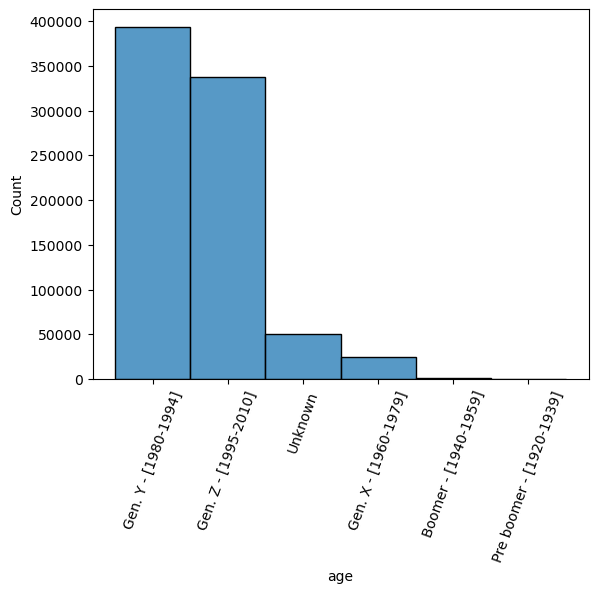

<Figure size 1400x1000 with 0 Axes>

In [46]:
sns.histplot(transactions2['age'])
plt.xticks(rotation = 70)
plt.figure(figsize=(14,10))
plt.show()

In [47]:
transactions2['order_item_delivery_address_region'].value_counts()

order_item_delivery_address_region
ile de france                 393373
auvergne rhone alpes           93349
occitanie                      60142
nouvelle aquitaine             51425
provence alpes cote d azur     45074
hauts de france                40570
grand est                      35507
pays de la loire               29699
bretagne                       18083
normandie                      15287
centre val de loire            11780
bourgogne franche comte         8238
Unknown                         4951
reunion                          132
corse                             60
greater london                     4
cataluna                           1
canarias                           1
Name: count, dtype: int64

In [48]:
pie_data = transactions2['merchant_name'].value_counts()
pie_data


merchant_name
uber eats    442797
deliveroo    260964
just eat     103915
Name: count, dtype: int64

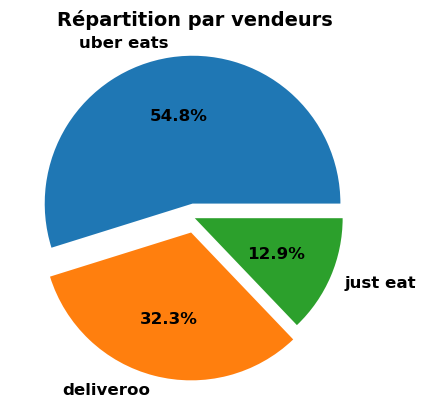

In [49]:
plt.pie(pie_data.values,
        labels=pie_data.index,    #labels pour afficher les noms des catégories dans le graphique
        autopct='%0.1f%%',        # définit le nombre de chiffres significatifs du résultat affiché
        explode=[0.1, 0.1, 0],   # éloigne les portions choisies du centre
        textprops={'weight': 'bold', 'fontsize': 12})
plt.title('Répartition par vendeurs',  fontweight='bold', fontsize=14)
plt.show()

In [50]:
pie_data2 = transactions2['sex'].value_counts()
pie_data2

sex
male       548952
female     228338
unknown     30386
Name: count, dtype: int64

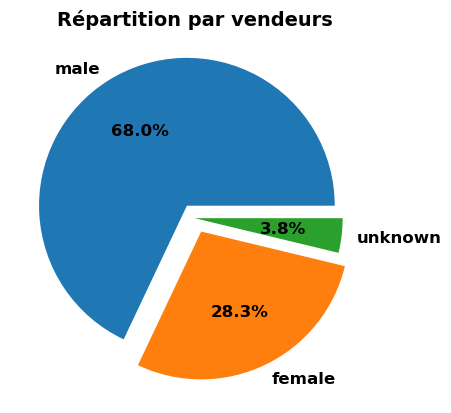

In [51]:
plt.pie(pie_data2.values,
        labels=pie_data2.index,    #labels pour afficher les noms des catégories dans le graphique
        autopct='%0.1f%%',        # définit le nombre de chiffres significatifs du résultat affiché
        explode=[0.1, 0.1, 0],   # éloigne les portions choisies du centre
        textprops={'weight': 'bold', 'fontsize': 12})
plt.title('Répartition par vendeurs',  fontweight='bold', fontsize=14)
plt.show()

In [52]:
transactions3 = transactions2

In [53]:
transactions3

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short
0,1,2,Gen. Y - [1980-1994],deliveroo,2020-01-15,12,10.3,Unknown,0.0,0.0,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,2020-01,female,Asian,Thai,Lunch,no_promo,Ile de France - rest of IDF
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region
3,4,1,Gen. Y - [1980-1994],just eat,2019-01-11,21,0.0,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,ile de france,val d oise,cergy,0,1,0,2019-01,male,Unknown,Unknown,Dinner,no_promo,Ile de France - rest of IDF
4,5,3,Gen. Z - [1995-2010],deliveroo,2019-12-15,20,25.3,Unknown,2.5,0.0,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,2019-12,unknown,Latin american,Mexican,Dinner,promo applied,Ile de France - rest of IDF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807671,807672,2,Gen. Z - [1995-2010],just eat,2019-04-10,20,0.6,Unknown,0.0,0.0,NaN,0.0,Unknown,Unknown,provence alpes cote d azur,bouches du rhone,marseille,0,1,0,2019-04,female,Unknown,Unknown,Dinner,no_promo,Other region
807672,807673,2,Gen. Z - [1995-2010],uber eats,2020-06-01,18,16.3,paypal,0.5,1.4,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0,2020-06,female,Asian,Japanese,Afternoon,no_promo,Other region
807673,807674,1,Unknown,uber eats,2018-12-02,19,15.9,paypal,3.9,0.0,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0,2018-12,male,Latin american,Mexican,Dinner,no_promo,Other region
807674,807675,2,Gen. Z - [1995-2010],uber eats,2020-03-14,17,30.0,payment card - visa,3.5,0.0,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0,2020-03,female,North american,Burger,Afternoon,no_promo,Other region


In [54]:
tab_ub_del['day_of_week']=tab_ub_del['order_date'].dt.day_name()
tab_ub_del['day_of_week']

1          Thursday
2         Wednesday
5          Thursday
7           Tuesday
8          Thursday
            ...    
807658     Thursday
807661      Tuesday
807664      Tuesday
807667       Monday
807670       Monday
Name: day_of_week, Length: 703761, dtype: object

In [55]:
#nb de commandes par région
tab_ub_del.groupby('order_item_delivery_address_region')['order_total_paid'].count().round(2).sort_values(ascending=False)

order_item_delivery_address_region
ile de france                 334400
auvergne rhone alpes           85798
occitanie                      53326
nouvelle aquitaine             48599
provence alpes cote d azur     36980
hauts de france                34442
grand est                      30966
pays de la loire               27319
bretagne                       16885
normandie                      14150
centre val de loire            10164
bourgogne franche comte         6874
Unknown                         3677
reunion                          132
corse                             43
greater london                     4
cataluna                           1
canarias                           1
Name: order_total_paid, dtype: int64

In [56]:
#CA par type de cuisine (catégories et sous-catégories)
tab_ub_del.groupby(['Category_name','Sub_category_name'])['order_total_paid'].sum().round(0)

Category_name   Sub_category_name      
African         African                      79001.0
Asian           Asian - Others              333516.0
                Chinese                     256136.0
                Indian                      517458.0
                Japanese                   1795080.0
                Korean                      102328.0
                Thai                        613717.0
                Vietnamese                  366040.0
European        British                      10260.0
                European - Others           154332.0
                French                      603867.0
                Italian                    2060445.0
                Salad                       168016.0
                Spanish                      11904.0
Latin american  Latin american - Others      35282.0
                Mexican                    1092265.0
                Peruvian                      3886.0
Middle eastern  Kebab                       259252.0
      

In [57]:
tab_ub_del.groupby(['Category_name','promo_yes'])['order_total_paid'].count().to_frame()

order_total_paid
Category_name  promo_yes                      
African        no_promo                   2940
               promo applied               400
Asian          no_promo                 123852
               promo applied             22033
European       no_promo                 110161
               promo applied             17634
Latin american no_promo                  50645
               promo applied              8623
Middle eastern no_promo                  24790
               promo applied              3778
North american no_promo                 281581
               promo applied             36183
Others         no_promo                  14281
               promo applied              1997
Unknown        no_promo                   3853
               promo applied              1010

In [58]:
#nb de commandes par merchant
tab_ub_del.groupby('merchant_name')['order_total_paid'].count().sort_values(ascending=False)

merchant_name
uber eats    442797
deliveroo    260964
Name: order_total_paid, dtype: int64

In [59]:
tab_ub_del.isna().sum()

row_nb                                    0
gender                                    0
age                                       0
merchant_name                             0
order_date                                0
order_time                                0
order_total_paid                          0
payment_method_name                       0
order_delivery_fee                       10
order_processing_fee                      0
order_total_fees                          0
order_total_promo                         0
seller_name                               0
seller_category_name                      0
order_item_delivery_address_region        0
order_item_delivery_address_subregion     0
order_item_delivery_address_city          0
is_customer_month_ubereats                0
is_customer_month_justeat                 0
is_customer_month_deliveroo               0
periode                                   0
sex                                       0
Category_name                   

In [60]:
jeat = transactions[transactions['merchant_name']== 'just eat']
jeat

,row_nb,synthetic_gender,synthetic_age_generation,is_loyalty_deliveroo,merchant_name,order_date,order_time,order_total_paid,order_currency,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
3,4,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-01-11,21:00:00,0.0,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,cergy,0,1,0
9,10,1.0,Gen. Y - [1980-1994],NaN,just eat,2017-03-12,18:00:00,0.6,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,nouvelle aquitaine,haute vienne,limoges,0,1,0
19,20,2.0,Gen. Y - [1980-1994],NaN,just eat,2019-12-03,22:00:00,NaN,eur,NaN,0.0,0.0,NaN,0.0,sushi sake,asian - japanese - sushi,ile de france,paris,paris,0,1,0
24,25,2.0,Gen. Z - [1995-2010],NaN,just eat,2019-05-04,20:00:00,0.4,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,val d oise,argenteuil,0,1,0
27,28,1.0,Gen. Z - [1995-2010],NaN,just eat,2020-04-12,13:00:00,NaN,eur,NaN,0.0,0.0,NaN,0.0,smoky grill burger,north american - burger,NaN,NaN,NaN,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807619,807620,NaN,Gen. Z - [1995-2010],NaN,just eat,2019-10-17,22:00:00,NaN,eur,NaN,0.0,0.0,NaN,0.0,kebab d'or,middle eastern - kebab,auvergne rhone alpes,loire,st etienne,0,1,0
807628,807629,1.0,Gen. Z - [1995-2010],NaN,just eat,2018-04-25,14:00:00,0.0,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,seine et marne,coulommiers,0,1,0
807654,807655,1.0,Gen. X - [1960-1979],NaN,just eat,2017-01-26,20:00:00,0.6,eur,NaN,0.0,0.0,NaN,0.0,NaN,NaN,ile de france,hauts de seine,asnieres sur seine,0,1,0
807663,807664,1.0,Gen. Y - [1980-1994],NaN,just eat,2019-12-16,23:00:00,NaN,eur,NaN,0.0,0.0,NaN,0.0,pizza lyonnaise,european - italian - pizza,auvergne rhone alpes,rhone,lyon,0,1,0


In [61]:
tab = transactions3[(transactions3['merchant_name'] == 'deliveroo') | (transactions3['merchant_name'] == 'uber eats')]
tab

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short
0,1,2,Gen. Y - [1980-1994],deliveroo,2020-01-15,12,10.3,Unknown,0.0,0.0,0.0,0.0,thai in box,asian - thai,ile de france,hauts de seine,sevres,0,0,1,2020-01,female,Asian,Thai,Lunch,no_promo,Ile de France - rest of IDF
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region
4,5,3,Gen. Z - [1995-2010],deliveroo,2019-12-15,20,25.3,Unknown,2.5,0.0,2.5,4.0,o'tacos,latin american - mexican,ile de france,seine saint denis,aubervilliers,0,0,1,2019-12,unknown,Latin american,Mexican,Dinner,promo applied,Ile de France - rest of IDF
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807670,807671,1,Gen. Z - [1995-2010],deliveroo,2020-01-20,12,24.5,Unknown,2.7,0.0,2.7,0.0,waffle factory,others,provence alpes cote d azur,bouches du rhone,marseille,0,0,1,2020-01,male,Others,Others,Lunch,no_promo,Other region
807672,807673,2,Gen. Z - [1995-2010],uber eats,2020-06-01,18,16.3,paypal,0.5,1.4,1.8,0.0,planet sushi,asian - japanese - sushi,centre val de loire,loiret,orleans,1,0,0,2020-06,female,Asian,Japanese,Afternoon,no_promo,Other region
807673,807674,1,Unknown,uber eats,2018-12-02,19,15.9,paypal,3.9,0.0,3.9,0.0,o'tacos,latin american - mexican,occitanie,haute garonne,toulouse,1,0,0,2018-12,male,Latin american,Mexican,Dinner,no_promo,Other region
807674,807675,2,Gen. Z - [1995-2010],uber eats,2020-03-14,17,30.0,payment card - visa,3.5,0.0,5.3,0.0,mcdonald's,north american - burger,hauts de france,nord,valenciennes,1,0,0,2020-03,female,North american,Burger,Afternoon,no_promo,Other region


In [62]:
totalfee = tab_ub_del.groupby(['merchant_name','periode'])['order_total_fees'].mean()
totalfee=totalfee.reset_index()

In [63]:
totalfee

,merchant_name,periode,order_total_fees
0,deliveroo,2017-01,2.544964
1,deliveroo,2017-02,2.565620
2,deliveroo,2017-03,2.563950
3,deliveroo,2017-04,2.533922
4,deliveroo,2017-05,2.562946
...,...,...,...
79,uber eats,2020-02,4.695159
80,uber eats,2020-03,3.666435
81,uber eats,2020-04,5.041812
82,uber eats,2020-05,5.150145


In [64]:
totalfee = totalfee.set_index('periode')

In [65]:
totalfee = totalfee.reset_index()

In [66]:
totalfee['periode']=totalfee['periode'].astype(str)

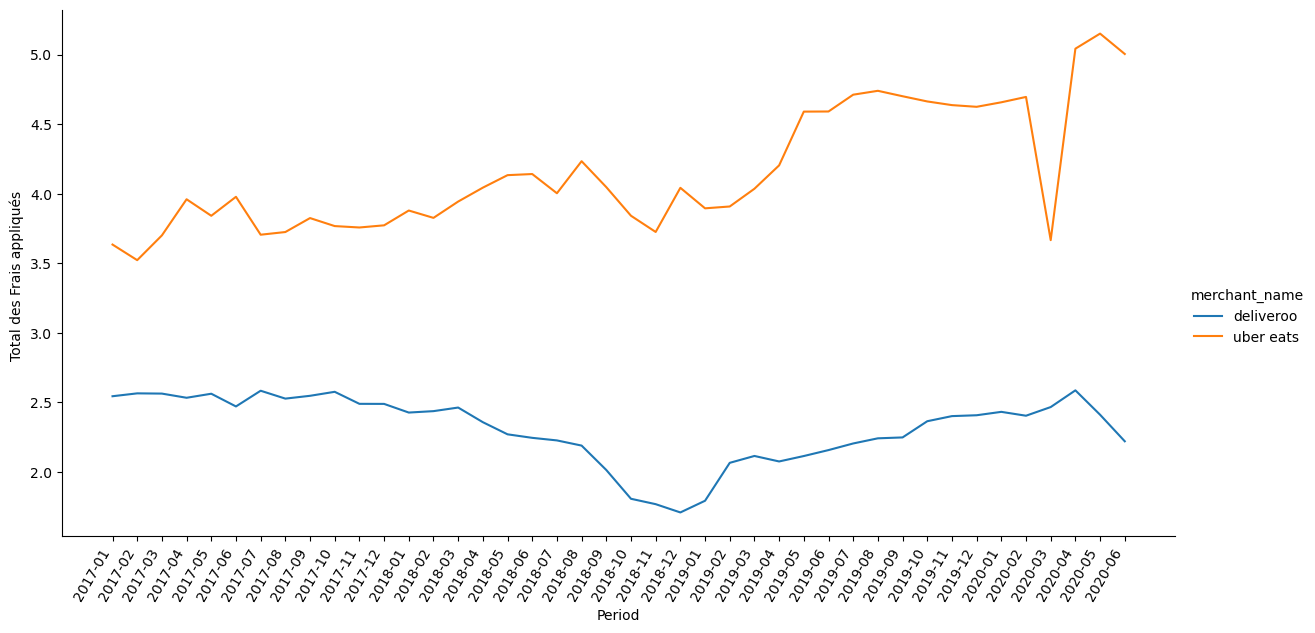

In [67]:
sns.relplot(data=totalfee, x='periode', y='order_total_fees', hue='merchant_name', kind="line", height=6, aspect=2)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Period')
plt.ylabel('Total des Frais appliqués ')
plt.show()


In [68]:
totalpaid = tab_ub_del.groupby(['merchant_name','periode'])['order_total_paid'].mean()
totalpaid=totalpaid.reset_index()

In [69]:
totalpaid = totalpaid.set_index('periode')
totalpaid = totalpaid.reset_index()
totalpaid['periode']=totalpaid['periode'].astype(str)

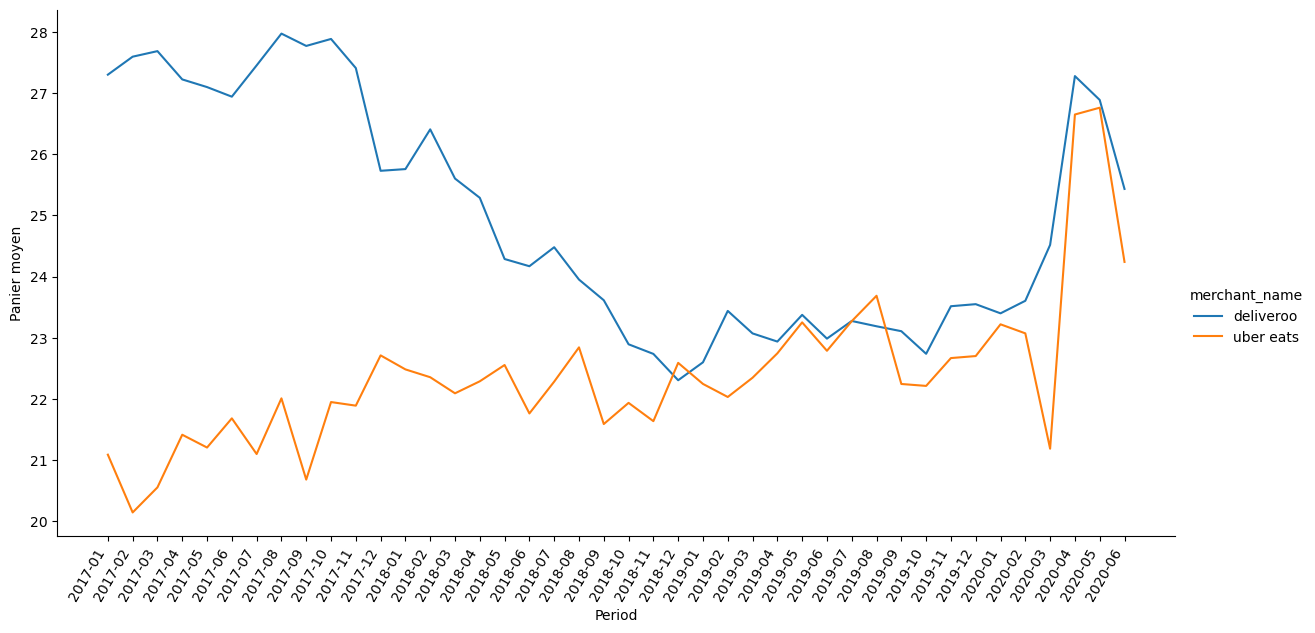

In [70]:
sns.relplot(data=totalpaid, x='periode', y='order_total_paid', hue='merchant_name', kind="line", height=6, aspect=2)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Period')
plt.ylabel('Panier moyen')
plt.show()

In [71]:
totalvolume = transactions2.groupby(['merchant_name','periode'])['order_total_paid'].count()
totalvolume=totalvolume.reset_index()

In [72]:
totalvolume

,merchant_name,periode,order_total_paid
0,deliveroo,2017-01,2502
1,deliveroo,2017-02,2484
2,deliveroo,2017-03,3018
3,deliveroo,2017-04,2830
4,deliveroo,2017-05,2804
...,...,...,...
121,uber eats,2020-02,20037
122,uber eats,2020-03,20039
123,uber eats,2020-04,14833
124,uber eats,2020-05,29674


In [73]:
totalvolume = totalvolume.set_index('periode')
totalvolume = totalvolume.reset_index()
totalvolume['periode']=totalvolume['periode'].astype(str)

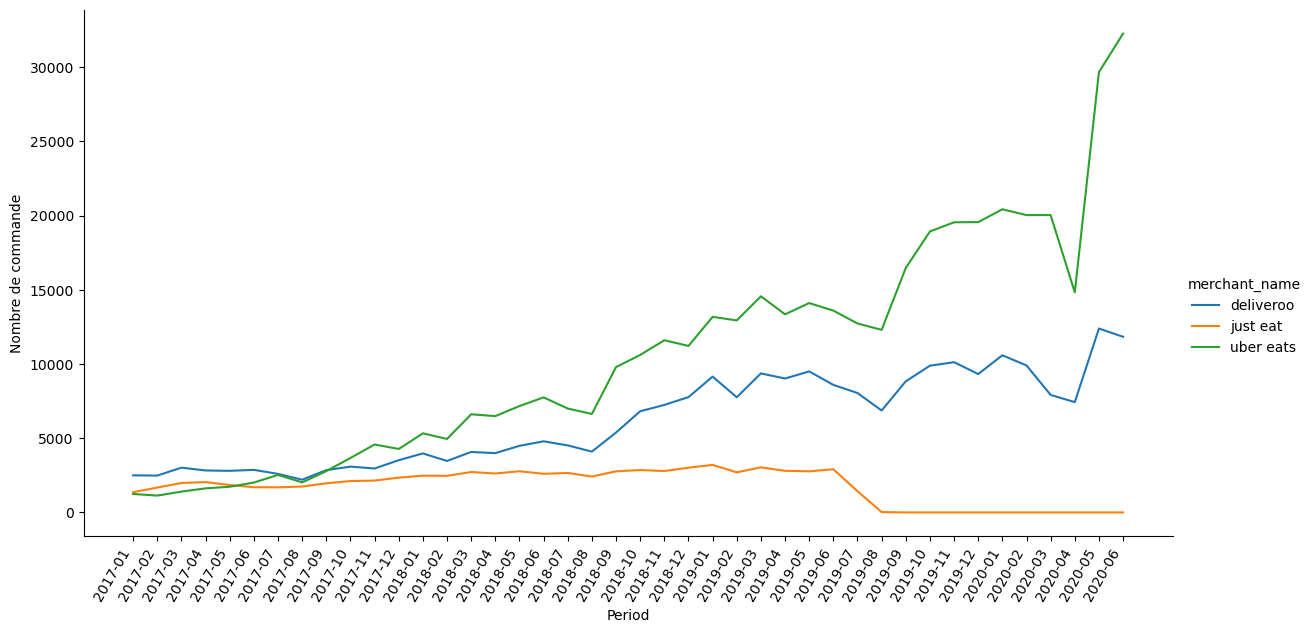

In [74]:
sns.relplot(data=totalvolume, x='periode', y='order_total_paid', hue='merchant_name', kind="line", height=6, aspect=2)
plt.xticks(rotation=60, ha='right')
plt.xlabel('Period')
plt.ylabel('Nombre de commande')
plt.show()

In [75]:
totalvolume[totalvolume['merchant_name']=='just eat']

,periode,merchant_name,order_total_paid
42,2017-01,just eat,1364
43,2017-02,just eat,1679
44,2017-03,just eat,1985
45,2017-04,just eat,2044
46,2017-05,just eat,1850
47,2017-06,just eat,1698
48,2017-07,just eat,1695
49,2017-08,just eat,1745
50,2017-09,just eat,1964
51,2017-10,just eat,2116


In [76]:
product2.groupby('id_order')['product_name'].count().mean()

2.2837425404944587

In [77]:
transactions2['subregion_short'].unique()

array(['Ile de France - rest of IDF', 'Other region',
       'Ile de France - Paris'], dtype=object)

In [78]:
#dico
dicodoc = {'idf - paris':'Ile de France - Paris', 'idf - rest of idf':'Ile de France - rest of IDF','other region':'Other region'}
customers['subregion_short']=customers['order_item_delivery_address_region'].replace(dicodoc)

In [79]:
customers['subregion_short'].unique()

array(['Ile de France - Paris', 'Ile de France - rest of IDF',
       'Other region'], dtype=object)

In [80]:
customers

,year_month,merchant_name,order_item_delivery_address_region,count_customers,periode,subregion_short
0,2017-01-01,deliveroo,idf - paris,544,2017-01,Ile de France - Paris
1,2017-01-01,deliveroo,idf - rest of idf,121,2017-01,Ile de France - rest of IDF
2,2017-01-01,deliveroo,other region,636,2017-01,Other region
3,2017-01-01,just eat,idf - paris,167,2017-01,Ile de France - Paris
4,2017-01-01,just eat,idf - rest of idf,358,2017-01,Ile de France - rest of IDF
...,...,...,...,...,...,...
373,2020-06-01,just eat,idf - rest of idf,684,2020-06,Ile de France - rest of IDF
374,2020-06-01,just eat,other region,769,2020-06,Other region
375,2020-06-01,uber eats,idf - paris,2019,2020-06,Ile de France - Paris
376,2020-06-01,uber eats,idf - rest of idf,3278,2020-06,Ile de France - rest of IDF


In [81]:
customers.groupby(['merchant_name','subregion_short'])['count_customers'].sum().to_frame()

count_customers
merchant_name subregion_short                             
deliveroo     Ile de France - Paris                  37003
              Ile de France - rest of IDF            15992
              Other region                           64117
just eat      Ile de France - Paris                   7479
              Ile de France - rest of IDF            24723
              Other region                           25676
uber eats     Ile de France - Paris                  41264
              Ile de France - rest of IDF            45749
              Other region                          107734

In [82]:
customers.groupby('merchant_name')['count_customers'].sum().to_frame()

,count_customers
merchant_name,
deliveroo,117112
just eat,57878
uber eats,194747


In [83]:
transactions2.groupby(['merchant_name', 'Category_name'])['row_nb'].count()

merchant_name  Category_name 
deliveroo      African             1306
               Asian              68099
               European           59731
               Latin american     16013
               Middle eastern     11710
               North american     94869
               Others              7627
               Unknown             1609
just eat       African              369
               Asian               8715
               European            8951
               Latin american      1787
               Middle eastern      1082
               North american      7237
               Others               823
               Unknown            74951
uber eats      African             2034
               Asian              77786
               European           68064
               Latin american     43255
               Middle eastern     16858
               North american    222895
               Others              8651
               Unknown             3254
Name: row_

In [84]:
transactions2.groupby(['hour_range','Category_name','Sub_category_name'])['row_nb'].count().head(60)

hour_range  Category_name   Sub_category_name      
Afternoon   African         African                       469
            Asian           Asian - Others               1887
                            Chinese                      1359
                            Indian                       2533
                            Japanese                     8611
                            Korean                        514
                            Thai                         3158
                            Vietnamese                   2160
            European        British                        71
                            European - Others            1194
                            French                       4870
                            Italian                     11854
                            Salad                        1244
                            Spanish                        98
            Latin american  Latin american - Others       211
                  

In [85]:
transactions2['day_of_week']=transactions2['order_date'].dt.day_name()
transactions2['day_of_week']

0         Wednesday
1          Thursday
2         Wednesday
3            Friday
4            Sunday
            ...    
807671    Wednesday
807672       Monday
807673       Sunday
807674     Saturday
807675     Thursday
Name: day_of_week, Length: 807676, dtype: object

In [86]:
transactions2.groupby(['day_of_week','hour_range','age'])['row_nb'].count().sort_values(ascending=False)

day_of_week  hour_range  age                     
Sunday       Dinner      Gen. Y - [1980-1994]        42289
Friday       Dinner      Gen. Y - [1980-1994]        37540
Sunday       Dinner      Gen. Z - [1995-2010]        32237
Thursday     Dinner      Gen. Y - [1980-1994]        31911
Wednesday    Dinner      Gen. Y - [1980-1994]        31271
                                                     ...  
Thursday     Morning     Boomer - [1940-1959]            1
Monday       Night       Pre boomer - [1920-1939]        1
Tuesday      Night       Pre boomer - [1920-1939]        1
Sunday       Night       Pre boomer - [1920-1939]        1
Wednesday    Night       Pre boomer - [1920-1939]        1
Name: row_nb, Length: 202, dtype: int64

In [87]:
transactions2.groupby(['day_of_week','hour_range','Category_name'])['row_nb'].count().sort_values(ascending=False).head(60)

day_of_week  hour_range  Category_name 
Sunday       Dinner      North american    31524
Friday       Dinner      North american    27513
Thursday     Dinner      North american    24093
Saturday     Dinner      North american    23569
Wednesday    Dinner      North american    23535
Tuesday      Dinner      North american    21775
Monday       Dinner      North american    20180
Sunday       Dinner      Asian             17803
Friday       Dinner      Asian             15261
Thursday     Dinner      Asian             13576
Sunday       Dinner      European          13349
Saturday     Dinner      Asian             13234
Wednesday    Dinner      Asian             13207
Friday       Dinner      European          13194
Tuesday      Dinner      Asian             12956
Sunday       Afternoon   North american    12822
Monday       Dinner      Asian             12200
Sunday       Lunch       North american    11417
Saturday     Lunch       North american    11412
Thursday     Dinner      Euro

In [88]:
#transactions2['provider']=transactions2['merchant_name'].astype('category').cat.codes
#transactions2['age1']=transactions2['age'].astype('category').cat.codes
#transactions4=transactions2.select_dtypes(include='number')
#transactions4=transactions4[['provider','age1', 'gender','order_time', 'order_total_paid', 'order_total_fees', 'order_delivery_fee','order_total_promo','order_processing_fee','is_customer_month_ubereats','is_customer_month_justeat', 'is_customer_month_deliveroo']]
#transactions4.corr()

In [89]:
#check des restos qui font le max de CA chez deliveroo
resto_del = transactionsdel.groupby('seller_name')['order_total_paid'].sum().sort_values(ascending=False).head(50)
resto_del = resto_del.reset_index()
list_del = resto_del['seller_name'].to_list()

In [90]:
#check des restos qui font le max de CA chez uber
resto_uber = transactionsuber.groupby('seller_name')['order_total_paid'].sum().sort_values(ascending=False).head(50)
resto_uber= resto_uber.reset_index()
list_uber = resto_uber['seller_name'].to_list()

In [91]:
liste_diff_del_uber = []
for x in list_del:
    if x not in list_uber :
        liste_diff_del_uber.append(x)
    else :
        continue
print(liste_diff_del_uber)

['five guys', 'le petit cambodge', 'quick', 'pny (paris new york)', 'tripletta', 'blend', 'eat salad', '231 east street', 'bagelstein', 'le ruisseau burger joint', 'mission saigon', 'out fry - chicken kitchen', 'mme shawn', 'chipotle', 'holy moly gourmet burger', "l'artisan du burger", 'la ripaille', 'pierre sang', 'alice pizza', 'cojean', 'le camion qui fume', 'nove', 'my little warung', 'woko', 'bagel corner', 'ds cafe', 'le ruisseau', 'it- italian trattoria', 'etoile du kashmir', 'kokomo']


In [92]:
liste_diff_uber_del = []
for x in list_uber:
    if x not in list_del :
        liste_diff_uber_del.append(x)
    else :
        continue
print(liste_diff_uber_del)

['planet sushi', 'tacos avenue', 'bioburger', 'new school tacos', 'buffalo grill', 'five pizza original', "steak 'n shake", 'woodiz pizza au feu de bois', 'fete a crepe', 'chicken spot', 'guy & sons', 'vapiano', 'la boite a pizza', 'nabab kebab', 'sakura', 'dominos', 'santosha', 'eat sushi', 'maison de la poutine', 'takos king', 'saint burger', 'tacos world', 'hd diner', 'nobi nobi', 'taj mahal', 'le tacos lyonnais', 'speed burger', 'la mie caline', "crep'way", 'la manufacture']


In [93]:
#tab_ub_del.to_csv('tab_ub_del.csv', index=False)
#FileLink('tab_ub_del.csv')

In [94]:
jeat.isna().sum()

row_nb                                        0
synthetic_gender                           2761
synthetic_age_generation                   7229
is_loyalty_deliveroo                     101524
merchant_name                                 0
order_date                                    0
order_time                                    0
order_total_paid                          30207
order_currency                                0
payment_method_name                      103912
order_delivery_fee                          189
order_processing_fee                          0
order_total_fees                         103915
order_total_promo                             0
seller_name                               74717
seller_category_name                      74951
order_item_delivery_address_region         1274
order_item_delivery_address_subregion      1274
order_item_delivery_address_city           1274
is_customer_month_ubereats                    0
is_customer_month_justeat               

In [95]:
tab_ub_del_ca = tab_ub_del

In [96]:
# isolation des valeurs à 0 sur le order paid et la promo
tab_zero = tab_ub_del_ca[(tab_ub_del_ca['order_total_paid']==0) & (tab_ub_del_ca['order_total_promo']==0)]

In [97]:
tab_zero.index

Index([  7786,  14082,  18024,  27389,  29089,  34739,  56961,  66071,  77787,
       113025,
       ...
       790760, 796445, 796793, 798995, 800074, 800121, 801530, 805229, 805626,
       806187],
      dtype='int64', length=524)

In [98]:
tab_ub_del_ca['order_total_paid'].idxmax()

745777

In [99]:
tab_ub_del_ca = tab_ub_del_ca.drop(tab_zero.index)

In [100]:
tab_ub_del_ca = tab_ub_del_ca.drop(tab_ub_del_ca['order_total_paid'].idxmax())

In [101]:
tab_ub_del_ca['day_of_week']=tab_ub_del_ca['order_date'].dt.day_name()
tab_ub_del_ca['day_of_week']

1          Thursday
2         Wednesday
5          Thursday
7           Tuesday
8          Thursday
            ...    
807658     Thursday
807661      Tuesday
807664      Tuesday
807667       Monday
807670       Monday
Name: day_of_week, Length: 703236, dtype: object

In [102]:
tab_ub_del_ca

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,order_delivery_fee_i,day_of_week
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,2.5,Thursday
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,3.0,Wednesday
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,2.5,Thursday
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,2.5,Tuesday
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,3.5,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,3.5,Thursday
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,0.0,Tuesday
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,2.5,Tuesday
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,2.4,Monday


In [103]:
products

,order_date,id_order,product_name,product_description,merchant_name
0,2017-01-01,AVkmcB3KFSf772cTh6V2M9yGwuQ=,toast goody woody,NaN,deliveroo
1,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,soupe miso,sauce soja,deliveroo
2,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salmon lovers,"sauce soja sucree, baguettes, sauce soja sucre...",deliveroo
3,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,super mix,any three skewers with lamb & chicken doner se...,deliveroo
4,2017-01-01,CQeMFF72l4u80Ae4mnVLhnTzqx0=,salade de choux,NaN,deliveroo
...,...,...,...,...,...
1711611,2020-06-30,/7xBQ0v3sf7rNfCQfhezNVgKLgM=,menu le saint nicolas burger,NaN,uber eats
1711612,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711613,2020-06-30,/8gXFRj4oFFrwX6tiZMmKmPePqs=,menu tacos mixte,NaN,uber eats
1711614,2020-06-30,//FH2PpgKmXmDNP1vRO4E3a3y0Y=,bouchees camembert x6,NaN,deliveroo


In [104]:
#tab_ub_del_ca.to_csv('tab_ub_del_ca.csv', index=False)
#FileLink('tab_ub_del_ca.csv')

In [105]:
#product2.to_csv('product2.csv', index=False)
#FileLink('product2.csv')

In [106]:
#customers.to_csv('customers.csv', index=False)
#FileLink('customers.csv')

In [107]:
tab_ub_del_ca.min()

row_nb                                                       1
gender                                                       1
age                                       Boomer - [1940-1959]
merchant_name                                        deliveroo
order_date                                 2017-01-01 00:00:00
order_time                                                   0
order_total_paid                                           0.0
payment_method_name                                    Unknown
order_delivery_fee                                         0.0
order_processing_fee                                       0.0
order_total_fees                                           0.0
order_total_promo                                          0.0
seller_name                                        !el gringo!
seller_category_name                                   Unknown
order_item_delivery_address_region                     Unknown
order_item_delivery_address_subregion                  

In [108]:
tab_ub_del_ca.groupby('seller_category_name')['order_total_paid'].mean()

seller_category_name
Unknown                        23.887289
african                        23.674138
asian - chinese                26.168359
asian - indian                 27.615450
asian - japanese - others      27.423203
asian - japanese - sushi       29.706646
asian - korean                 25.646090
asian - others                 26.209532
asian - thai                   25.516248
asian - vietnamese             24.684099
european - british             22.648565
european - french              21.180870
european - italian - others    26.575431
european - italian - pasta     21.092980
european - italian - pizza     24.318650
european - others              21.859986
european - salad               21.030892
european - spanish             25.991703
latin american - mexican       18.891437
latin american - others        26.748749
latin american - peruvian      42.236957
middle eastern - kebab         17.507550
middle eastern - lebanese      25.136955
middle eastern - others        21.65

In [109]:
#CA selon le merchant
tab_ub_del_ca.groupby('merchant_name')['order_total_paid'].sum().sort_values(ascending=False)

merchant_name
uber eats    10174299.4
deliveroo     6353471.5
Name: order_total_paid, dtype: float64

In [110]:
#CA par région
tab_ub_del_ca.groupby('order_item_delivery_address_region')['order_total_paid'].sum().round(2).sort_values(ascending=False)

order_item_delivery_address_region
ile de france                 8066905.3
auvergne rhone alpes          1953645.6
occitanie                     1209413.8
nouvelle aquitaine            1094713.1
provence alpes cote d azur     903719.6
hauts de france                778901.5
grand est                      697439.4
pays de la loire               636629.8
bretagne                       379213.9
normandie                      325707.0
centre val de loire            230523.8
bourgogne franche comte        150116.4
Unknown                         96991.8
reunion                          2435.3
corse                            1305.5
greater london                     54.9
canarias                           28.1
cataluna                           26.1
Name: order_total_paid, dtype: float64

In [111]:
#CA par région et par période
tab_ub_del_ca.groupby(['periode','order_item_delivery_address_region'])['order_total_paid'].sum().round(0).to_frame()

order_total_paid
periode order_item_delivery_address_region                  
2017-01 Unknown                                        260.0
        auvergne rhone alpes                         10126.0
        bretagne                                      1490.0
        grand est                                     1567.0
        hauts de france                               3400.0
...                                                      ...
2020-06 nouvelle aquitaine                           72969.0
        occitanie                                    80548.0
        pays de la loire                             42586.0
        provence alpes cote d azur                   62652.0
        reunion                                        334.0

[557 rows x 1 columns]

In [112]:
#CA par type de cuisine (continent)
tab_ub_del_ca.groupby('Category_name')['order_total_paid'].sum().sort_values(ascending=False).round(0)

Category_name
North american    7281158.0
Asian             3984276.0
European          3008823.0
Latin american    1131432.0
Middle eastern     589876.0
Others             337256.0
Unknown            115949.0
African             79001.0
Name: order_total_paid, dtype: float64

In [113]:
#Montant total des promos par plateforme de livraison
tab_ub_del_ca.groupby('merchant_name')['order_total_promo'].sum()

merchant_name
deliveroo    204688.2
uber eats    423963.3
Name: order_total_promo, dtype: float64

In [114]:
#par plateforme, CA total avec et sans promo, nb de commandes, panier moyen
print(tab_ub_del_ca.groupby(['merchant_name','promo_yes'])['order_total_paid'].sum(), 
      tab_ub_del.groupby(['merchant_name','promo_yes'])['order_total_paid'].count(),
      tab_ub_del_ca.groupby(['merchant_name','promo_yes'])['order_total_paid'].mean()
     )

merchant_name  promo_yes    
deliveroo      no_promo         5619609.6
               promo applied     733861.9
uber eats      no_promo         9062731.8
               promo applied    1111567.6
Name: order_total_paid, dtype: float64 merchant_name  promo_yes    
deliveroo      no_promo         225863
               promo applied     35101
uber eats      no_promo         386240
               promo applied     56557
Name: order_total_paid, dtype: int64 merchant_name  promo_yes    
deliveroo      no_promo         24.929950
               promo applied    20.907151
uber eats      no_promo         23.468730
               promo applied    19.653935
Name: order_total_paid, dtype: float64


In [115]:
#par seller_category, CA total avec et sans promo, nb de commandes, panier moyen
print( 
      tab_ub_del.groupby(['promo_yes','Category_name'])['order_total_paid'].count(),
      tab_ub_del_ca.groupby(['promo_yes','Category_name'])['order_total_paid'].mean()
     )

promo_yes      Category_name 
no_promo       African             2940
               Asian             123852
               European          110161
               Latin american     50645
               Middle eastern     24790
               North american    281581
               Others             14281
               Unknown             3853
promo applied  African              400
               Asian              22033
               European           17634
               Latin american      8623
               Middle eastern      3778
               North american     36183
               Others              1997
               Unknown             1010
Name: order_total_paid, dtype: int64 promo_yes      Category_name 
no_promo       African           24.205754
               Asian             28.034255
               European          24.125553
               Latin american    19.526412
               Middle eastern    21.069860
               North american    23.394612
     

In [116]:
tab_ub_del_ca.groupby('merchant_name')['order_total_fees'].sum()

merchant_name
deliveroo     589911.8
uber eats    1949037.4
Name: order_total_fees, dtype: float64

In [117]:
tab_ub_del_ca['provider']=tab_ub_del_ca['merchant_name'].astype('category').cat.codes
tab_ub_del_ca['age1']=tab_ub_del_ca['age'].astype('category').cat.codes
transactions4=tab_ub_del_ca.select_dtypes(include='number')
transactions4=transactions4[['provider','age1', 'gender','order_time', 'order_total_paid', 'order_total_fees', 'order_delivery_fee','order_total_promo','order_processing_fee','is_customer_month_ubereats','is_customer_month_justeat', 'is_customer_month_deliveroo']]
transactions4.corr()

,provider,age1,gender,order_time,order_total_paid,order_total_fees,order_delivery_fee,order_total_promo,order_processing_fee,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo
provider,1.000000,0.099112,0.003750,-0.052898,-0.053294,0.395916,0.235559,0.028475,0.221998,0.821685,0.031000,-0.828658
age1,0.099112,1.000000,0.042550,-0.023797,-0.091441,0.036433,0.020537,0.025227,0.032374,0.098269,0.003043,-0.096471
gender,0.003750,0.042550,1.000000,0.002104,0.012364,-0.000478,0.026194,0.018043,0.018423,-0.017832,-0.053978,-0.023122
order_time,-0.052898,-0.023797,0.002104,1.000000,0.095413,0.000798,-0.009965,0.027605,0.013984,-0.051102,-0.009569,0.036503
order_total_paid,-0.053294,-0.091441,0.012364,0.095413,1.000000,0.198444,0.110657,-0.108333,0.126697,-0.065450,0.004829,0.045290
order_total_fees,0.395916,0.036433,-0.000478,0.000798,0.198444,1.000000,0.429030,0.040136,0.220904,0.321148,0.019655,-0.331144
order_delivery_fee,0.235559,0.020537,0.026194,-0.009965,0.110657,0.429030,1.000000,-0.036997,-0.226501,0.184001,0.015068,-0.194016
order_total_promo,0.028475,0.025227,0.018043,0.027605,-0.108333,0.040136,-0.036997,1.000000,0.165397,0.027385,-0.011288,-0.039534
order_processing_fee,0.221998,0.032374,0.018423,0.013984,0.126697,0.220904,-0.226501,0.165397,1.000000,0.182889,-0.019065,-0.191985
is_customer_month_ubereats,0.821685,0.098269,-0.017832,-0.051102,-0.065450,0.321148,0.184001,0.027385,0.182889,1.000000,0.034506,-0.680896


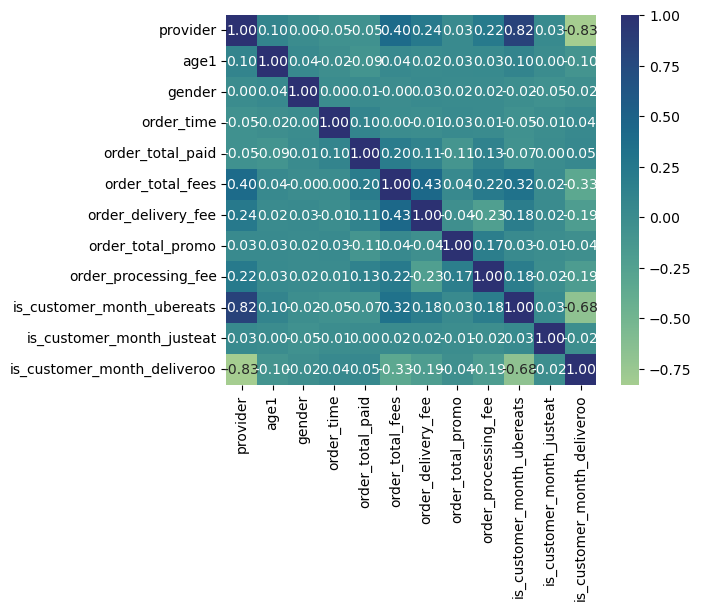

In [118]:
sns.heatmap(transactions4.corr(), square=True, annot=True, cmap='crest',fmt='.2f')
plt.show()

In [119]:
total_per_hour=tab_ub_del_ca.groupby('order_time')['order_total_paid'].sum().astype('int64')
total_per_hour

order_time
0      514313
1      223634
2      108622
3       61134
4       33646
5       21112
6       12219
7        8839
8       11980
9       28007
10     137426
11     469261
12     773921
13     940636
14     931609
15     663969
16     426379
17     432573
18     952341
19    1769256
20    2372803
21    2493762
22    1970680
23    1169639
Name: order_total_paid, dtype: int64

In [120]:
total_per_hour = pd.DataFrame(total_per_hour)

In [121]:
total_per_hour

,order_total_paid
order_time,
0,514313
1,223634
2,108622
3,61134
4,33646
5,21112
6,12219
7,8839
8,11980


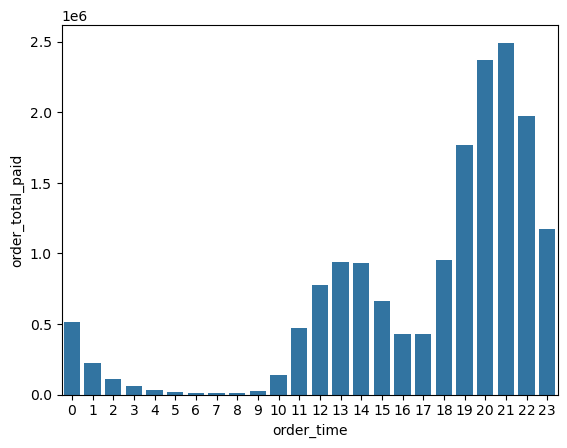

In [122]:
sns.barplot(total_per_hour, x='order_time',y='order_total_paid')
plt.show()

In [123]:
transactions2.to_csv('transactions2.csv', index=False)
FileLink('transactions2.csv')

NameError: name 'FileLink' is not defined

In [124]:
tab_ub_del_ca

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,order_delivery_fee_i,day_of_week,provider,age1
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,2.5,Thursday,1,3
2,3,1,Gen. Z - [1995-2010],uber eats,2020-02-05,12,10.6,paypal,3.0,0.7,3.7,0.0,los tacos,latin american - mexican,grand est,meurthe et moselle,maxeville,1,0,0,2020-02,male,Latin american,Mexican,Lunch,no_promo,Other region,3.0,Wednesday,1,3
5,6,1,Gen. Z - [1995-2010],uber eats,2018-09-06,22,24.0,payment card - visa,2.5,0.0,2.5,0.0,pizzou,european - italian - pizza,ile de france,paris,paris,1,0,0,2018-09,male,European,Italian,Dinner,no_promo,Ile de France - Paris,2.5,Thursday,1,3
7,8,1,Gen. Y - [1980-1994],uber eats,2018-12-04,21,13.7,payment card - visa,2.5,0.0,2.5,0.0,subway,north american - sandwich,nouvelle aquitaine,gironde,bordeaux,1,0,0,2018-12,male,North american,Sandwich,Dinner,no_promo,Other region,2.5,Tuesday,1,2
8,9,2,Gen. Z - [1995-2010],uber eats,2019-11-28,21,14.5,payment card - visa,3.5,0.0,3.5,0.0,sushi m,asian - japanese - sushi,ile de france,paris,paris,1,0,0,2019-11,female,Asian,Japanese,Dinner,no_promo,Ile de France - Paris,3.5,Thursday,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807658,807659,1,Gen. Z - [1995-2010],deliveroo,2020-03-12,20,24.4,Unknown,3.5,0.0,3.5,0.0,burger king,north american - burger,nouvelle aquitaine,vienne,poitiers,1,0,1,2020-03,male,North american,Burger,Dinner,no_promo,Other region,3.5,Thursday,0,3
807661,807662,1,Gen. Y - [1980-1994],deliveroo,2018-10-09,10,18.5,Unknown,0.0,0.0,0.0,0.0,massa,middle eastern - lebanese,nouvelle aquitaine,gironde,bordeaux,0,0,1,2018-10,male,Middle eastern,Lebanese,Morning,no_promo,Other region,0.0,Tuesday,0,2
807664,807665,1,Gen. X - [1960-1979],deliveroo,2018-12-18,21,35.2,Unknown,2.5,0.0,2.5,0.0,burger king,north american - burger,ile de france,paris,paris,0,0,1,2018-12,male,North american,Burger,Dinner,no_promo,Ile de France - Paris,2.5,Tuesday,0,1
807667,807668,2,Unknown,deliveroo,2019-01-28,19,13.6,Unknown,2.4,0.0,2.4,0.0,pierre sang,asian - korean,ile de france,paris,paris,0,0,1,2019-01,female,Asian,Korean,Dinner,no_promo,Ile de France - Paris,2.4,Monday,0,5


In [125]:
promo = tab_ub_del_ca[tab_ub_del_ca['promo_yes']=='promo applied']
promo['client_revenu']=promo['is_customer_month_ubereats']+promo['is_customer_month_justeat']+promo['is_customer_month_deliveroo']

,row_nb,gender,age,merchant_name,order_date,order_time,order_total_paid,payment_method_name,order_delivery_fee,order_processing_fee,order_total_fees,order_total_promo,seller_name,seller_category_name,order_item_delivery_address_region,order_item_delivery_address_subregion,order_item_delivery_address_city,is_customer_month_ubereats,is_customer_month_justeat,is_customer_month_deliveroo,periode,sex,Category_name,Sub_category_name,hour_range,promo_yes,subregion_short,order_delivery_fee_i,day_of_week,provider,age1
1,2,1,Gen. Z - [1995-2010],uber eats,2019-01-24,19,7.6,payment card - visa,2.5,0.0,2.5,5.0,nanbab - villeurbanne,asian - indian,auvergne rhone alpes,rhone,villeurbanne,1,0,1,2019-01,male,Asian,Indian,Dinner,promo applied,Other region,2.5,Thursday,1,3
29,30,2,Gen. Z - [1995-2010],uber eats,2019-08-25,17,5.3,payment card - visa,3.5,0.0,3.5,3.5,bchef,north american - others,auvergne rhone alpes,rhone,lyon,1,0,0,2019-08,female,North american,North american - Others,Afternoon,promo applied,Other region,3.5,Sunday,1,3
31,32,2,Gen. Y - [1980-1994],uber eats,2020-05-27,23,25.9,payment card - mastercard,4.0,2.9,7.7,10.0,mcdonald's,north american - burger,ile de france,seine et marne,cesson,1,0,0,2020-05,female,North american,Burger,Dinner,promo applied,Ile de France - rest of IDF,4.0,Wednesday,1,2
36,37,1,Gen. Y - [1980-1994],uber eats,2020-06-08,20,18.0,payment card - mastercard,1.0,2.1,6.8,7.0,burger king,north american - burger,centre val de loire,indre et loire,tours,1,0,0,2020-06,male,North american,Burger,Dinner,promo applied,Other region,1.0,Monday,1,2
51,52,2,Gen. Z - [1995-2010],uber eats,2020-03-20,20,13.9,paypal,0.0,0.0,4.0,10.0,so tasty,latin american - mexican,nouvelle aquitaine,gironde,bordeaux,1,0,0,2020-03,female,Latin american,Mexican,Dinner,promo applied,Other region,0.0,Friday,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807563,807564,1,Gen. Z - [1995-2010],deliveroo,2019-05-21,22,18.8,Unknown,2.7,0.0,2.7,6.0,quick,north american - burger,auvergne rhone alpes,puy de dome,clermont ferrand,1,0,1,2019-05,male,North american,Burger,Dinner,promo applied,Other region,2.7,Tuesday,0,3
807570,807571,2,Gen. Z - [1995-2010],deliveroo,2018-07-07,20,13.6,Unknown,2.5,0.0,2.5,1.8,woko,asian - thai,auvergne rhone alpes,rhone,lyon,1,0,1,2018-07,female,Asian,Thai,Dinner,promo applied,Other region,2.5,Saturday,0,3
807575,807576,1,Gen. Z - [1995-2010],deliveroo,2017-01-27,22,23.7,Unknown,2.5,0.0,2.5,5.0,restaurant vf,north american - others,pays de la loire,loire atlantique,nantes,0,0,1,2017-01,male,North american,North american - Others,Dinner,promo applied,Other region,2.5,Friday,0,3
807609,807610,1,Gen. Z - [1995-2010],deliveroo,2020-06-14,0,23.3,Unknown,1.7,0.0,2.2,3.3,le surcouf,north american - sandwich,provence alpes cote d azur,bouches du rhone,marseille,0,0,1,2020-06,male,North american,Sandwich,Night,promo applied,Other region,1.7,Sunday,0,3


In [126]:
len(promo)/len(tab_ub_del_ca)

0.13033746850275013